# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [7]:
import pandas as pd
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [8]:
import torch.nn as nn

In [9]:
df = pd.read_csv('Google_Stock_Price.csv', parse_dates=['date'])
df.drop('symbol', axis=1, inplace=True)
ts = df['close']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1761 non-null   datetime64[ns]
 1   open       1761 non-null   float64       
 2   high       1761 non-null   float64       
 3   low        1761 non-null   float64       
 4   close      1761 non-null   float64       
 5   volume     1761 non-null   int64         
 6   adjclose   1761 non-null   float64       
 7   dividends  1761 non-null   float64       
 8   splits     1761 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 123.9 KB
None
            count                           mean                  min  \
date         1761  2021-07-01 15:36:17.172061440  2018-01-02 00:00:00   
open       1761.0                     102.021411               48.695   
high       1761.0                     103.171589            50.176998   
low      

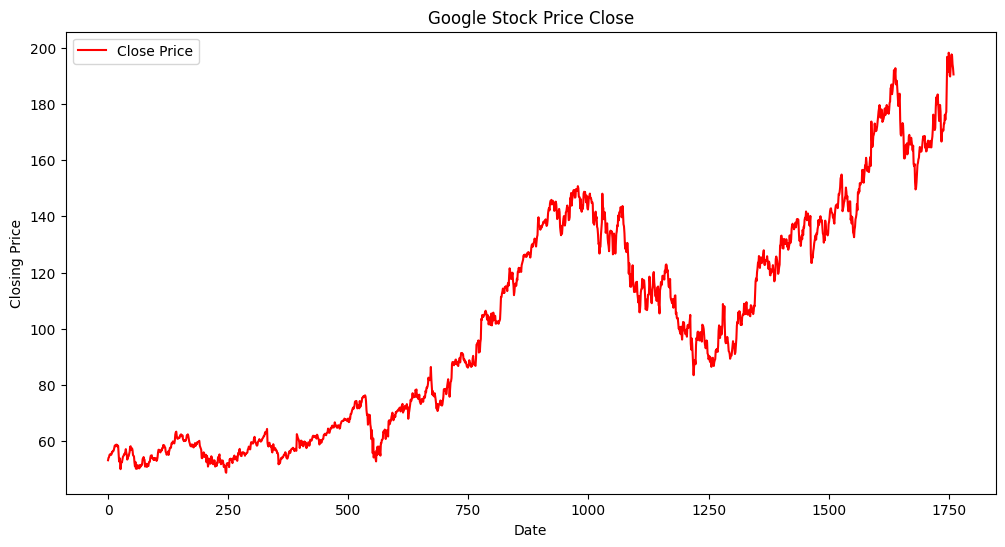

In [10]:
print(df.info())
print(df.describe().transpose())
print(df.isnull().sum())

plt.figure(figsize=(12,6))
plt.plot(df.index, df['close'], label = 'Close Price', color='red')
plt.title('Google Stock Price Close')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

p-value: 0.9548627697581813


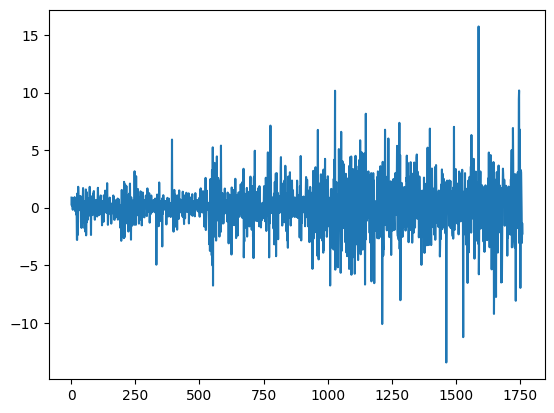

In [11]:
adf_result = adfuller(ts)
print(f'p-value: {adf_result[1]}')  # p < 0.05 → Stationary

ts_diff = ts.diff().dropna()  # Differencing
plt.plot(ts_diff, label = 'Adjusted Close')
plt.show()

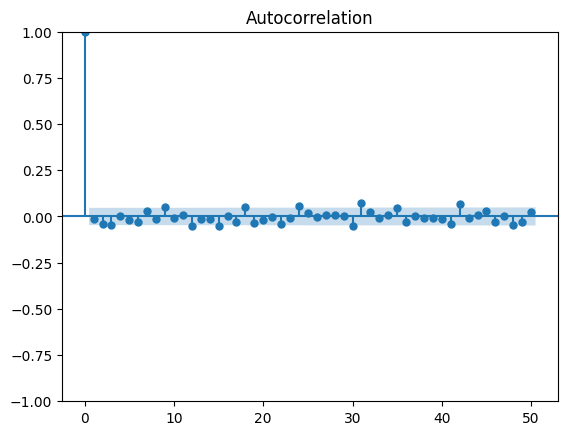

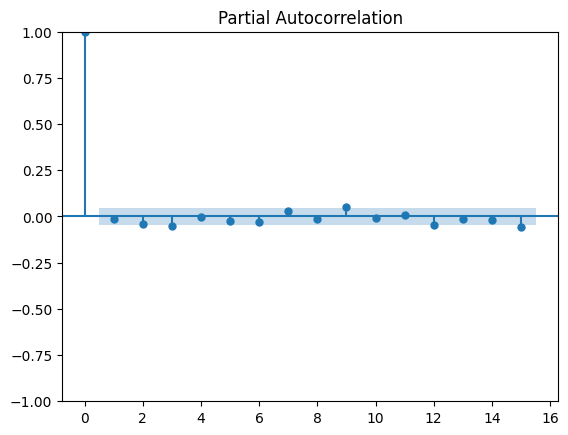

In [12]:
plot_acf(ts_diff, lags = 50);
plot_pacf(ts_diff, lags = 15);


In [13]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [14]:
check_stationarity(ts_diff)


ADF Statistic: -26.141611
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


In [15]:
df

,date,open,high,low,close,volume,adjclose,dividends,splits
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1756,2024-12-24,196.169998,197.669998,195.197998,197.570007,6809800,197.570007,0.0,0.0
1757,2024-12-26,196.740005,198.160004,195.869995,197.100006,7907900,197.100006,0.0,0.0
1758,2024-12-27,196.470001,196.800003,191.972000,194.039993,14693000,194.039993,0.0,0.0
1759,2024-12-30,190.865005,193.779999,190.360001,192.690002,12209500,192.690002,0.0,0.0


In [16]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'adjclose',
       'dividends', 'splits'],
      dtype='object')

In [17]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1761 non-null   datetime64[ns]
 1   open       1761 non-null   float64       
 2   high       1761 non-null   float64       
 3   low        1761 non-null   float64       
 4   close      1761 non-null   float64       
 5   volume     1761 non-null   int64         
 6   adjclose   1761 non-null   float64       
 7   dividends  1761 non-null   float64       
 8   splits     1761 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 123.9 KB


In [18]:
print("Stats Summary:")
df.describe().transpose()

Stats Summary:


,count,mean,min,25%,50%,75%,max,std
date,1761,2021-07-01 15:36:17.172061440,2018-01-02 00:00:00,2019-10-02 00:00:00,2021-07-01 00:00:00,2023-03-31 00:00:00,2024-12-31 00:00:00,NaN
open,1761.0,102.021411,48.695,61.463001,100.059998,135.570007,198.529999,39.637483
high,1761.0,103.171589,50.176998,62.043999,101.658997,137.070999,202.880005,40.020994
low,1761.0,100.982265,48.505501,60.938499,99.169998,134.183502,196.690002,39.27469
close,1761.0,102.092157,48.811001,61.496498,100.739998,135.990005,198.160004,39.637305
volume,1761.0,28593762.86201,6809800.0,19922000.0,25612000.0,33046000.0,124140000.0,13170636.255424
adjclose,1761.0,101.754831,48.63625,61.276325,100.379326,135.503128,198.160004,39.547744
dividends,1761.0,0.000341,0.0,0.0,0.0,0.0,0.2,0.00825
splits,1761.0,0.011357,0.0,0.0,0.0,0.0,20.0,0.476596


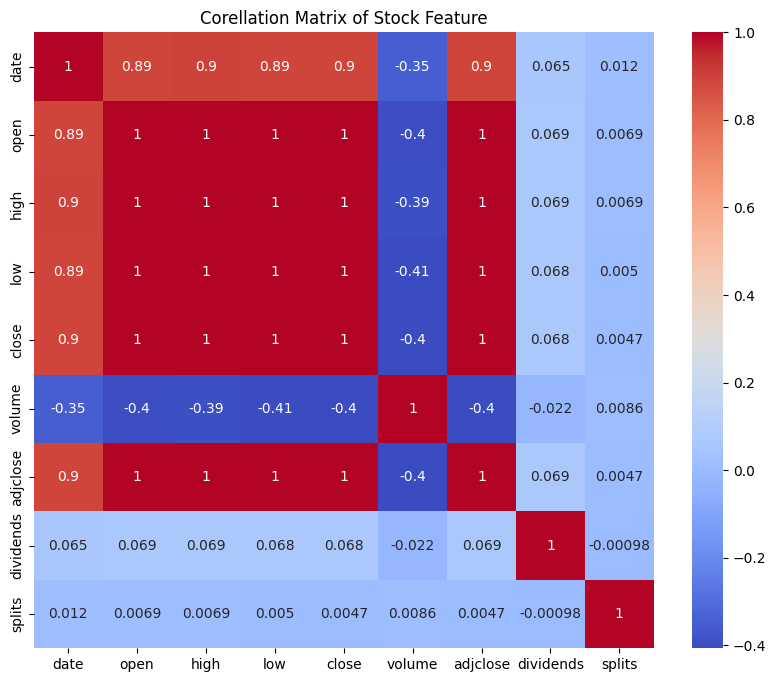

In [19]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Corellation Matrix of Stock Feature")
plt.show()

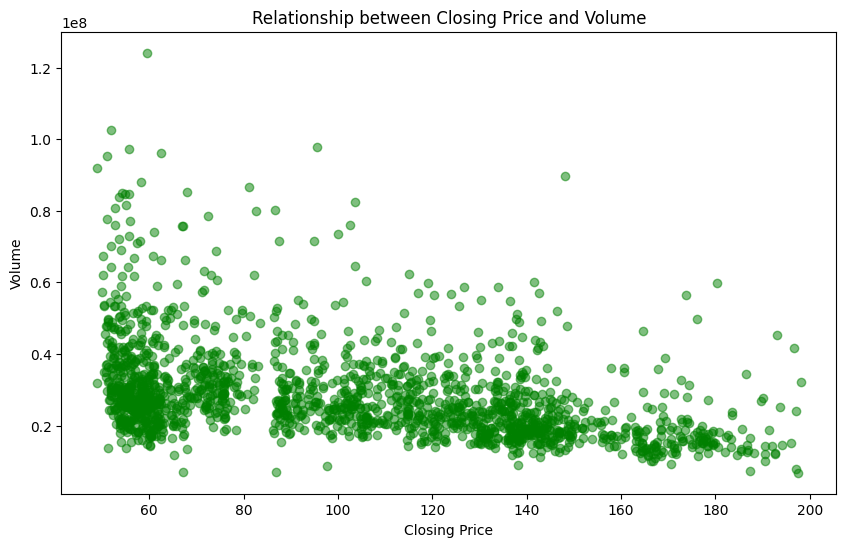

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['close'], df['volume'], alpha=0.5, color='green')
plt.title('Relationship between Closing Price and Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.show()

In [21]:
close_data = df[['close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
close_data_norm = scaler.fit_transform(close_data)

In [22]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60
X, y = create_sequences(close_data_norm, seq_length)

In [23]:
train_size = int(len(X) * 0.8)    # Split into training and testing sets 
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [24]:
import torch.nn as nn
class SimpleLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super(SimpleLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        # x: (batch_size, seq_length, input_size)
        out, _ = self.lstm(x)
        # Only take the output from the last time step
        out = self.fc(out[:, -1, :])
        return out

In [25]:
class MediumLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, num_layers=2, dropout=0.2):
        super(MediumLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [26]:
class ComplexLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=150, num_layers=3, dropout=0.5):
        super(ComplexLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [27]:
def train_model(model, train_loader, num_epochs=20, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    model.train()
    
    for epoch in range(num_epochs):
        epoch_losses = []
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {np.mean(epoch_losses):.6f}")
    return model

In [28]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout=0.5
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # last time step
        return out

In [29]:
model = LSTMModel(input_size=1, hidden_size=50, num_layers=1)
trained_model = train_model(model, train_loader, num_epochs=50)


Epoch [1/50], Loss: 0.050490
Epoch [2/50], Loss: 0.019531
Epoch [3/50], Loss: 0.004903
Epoch [4/50], Loss: 0.001947
Epoch [5/50], Loss: 0.001107
Epoch [6/50], Loss: 0.000736
Epoch [7/50], Loss: 0.000571
Epoch [8/50], Loss: 0.000484
Epoch [9/50], Loss: 0.000428
Epoch [10/50], Loss: 0.000412
Epoch [11/50], Loss: 0.000408
Epoch [12/50], Loss: 0.000393
Epoch [13/50], Loss: 0.000408
Epoch [14/50], Loss: 0.000386
Epoch [15/50], Loss: 0.000404
Epoch [16/50], Loss: 0.000406
Epoch [17/50], Loss: 0.000400
Epoch [18/50], Loss: 0.000410
Epoch [19/50], Loss: 0.000386
Epoch [20/50], Loss: 0.000395
Epoch [21/50], Loss: 0.000366
Epoch [22/50], Loss: 0.000372
Epoch [23/50], Loss: 0.000366
Epoch [24/50], Loss: 0.000361
Epoch [25/50], Loss: 0.000355
Epoch [26/50], Loss: 0.000355
Epoch [27/50], Loss: 0.000355
Epoch [28/50], Loss: 0.000376
Epoch [29/50], Loss: 0.000356
Epoch [30/50], Loss: 0.000355
Epoch [31/50], Loss: 0.000345
Epoch [32/50], Loss: 0.000346
Epoch [33/50], Loss: 0.000333
Epoch [34/50], Loss

In [30]:
def predict(model, X_data):
    model.eval()
    with torch.no_grad():
        predictions = model(X_data).detach().numpy()
    return predictions

pred_simple = predict(trained_model, X_test_tensor)

y_test_inv = scaler.inverse_transform(y_test)
pred_simple_inv = scaler.inverse_transform(pred_simple)

test_dates = df['date'].values[-len(y_test):]

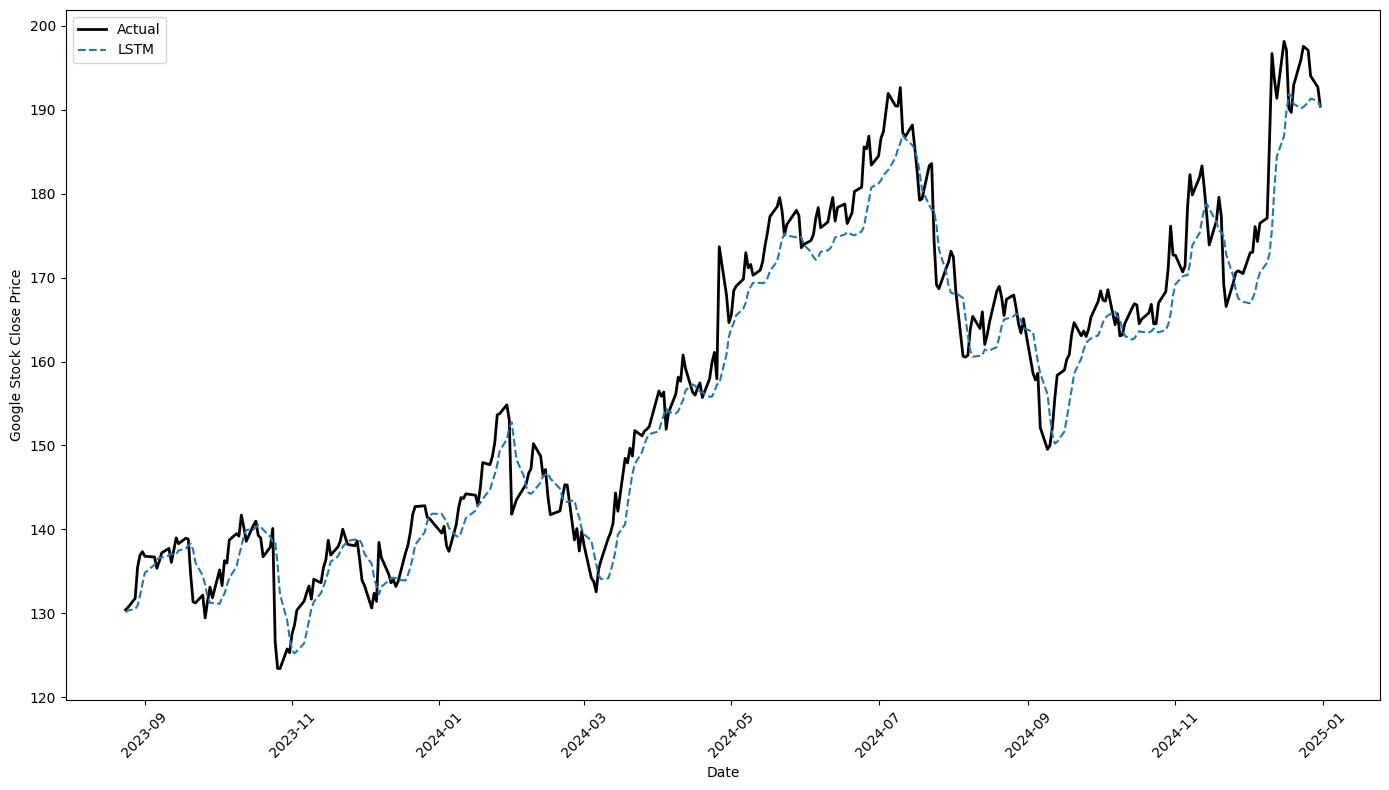

In [31]:
plt.figure(figsize=(14, 8))

plt.plot(test_dates, y_test_inv, label='Actual', color='black', linewidth=2)
plt.plot(test_dates, pred_simple_inv, label='LSTM', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Google Stock Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
import torch

last_sequence = close_data_norm[-seq_length:]
last_sequence_tensor = torch.from_numpy(last_sequence).float().unsqueeze(0)

def forecast_future(model, init_seq, forecast_days=10):
    """
    Forecast the next forecast_days values using a trained LSTM model.
    Args:
        model: trained PyTorch model.
        init_seq: tensor of shape (1, seq_length, 1) used as the initial input.
        forecast_days: number of days to forecast.
    Returns:
        A numpy array of forecasted normalized values.
    """
    model.eval()
    predictions = []
    current_seq = init_seq.clone()
    with torch.no_grad():
        for _ in range(forecast_days):
            pred = model(current_seq)
            predictions.append(pred.item())
            pred_tensor = pred.view(1, 1, 1)
            current_seq = torch.cat((current_seq[:, 1:, :], pred_tensor), dim=1)
    return np.array(predictions)

forecast_days = 10

forecast_simple = forecast_future(trained_model, last_sequence_tensor, forecast_days)

forecast_simple_inv = scaler.inverse_transform(forecast_simple.reshape(-1, 1))

last_date = pd.to_datetime(df['date'].iloc[-1])
forecast_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_days)

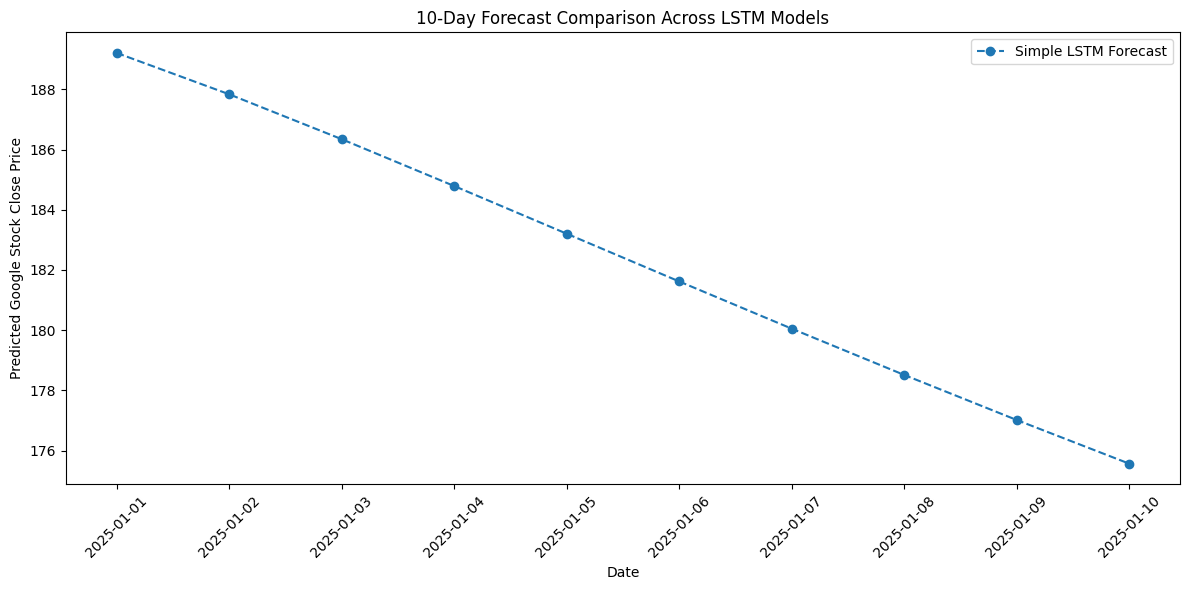

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecast_simple_inv, marker='o', linestyle='--', label='Simple LSTM Forecast')
plt.title("10-Day Forecast Comparison Across LSTM Models")
plt.xlabel("Date")
plt.ylabel("Predicted Google Stock Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Simple LSTM': forecast_simple_inv.flatten(),
})
print("Forecasted values for the next 10 days:")
print(forecast_df)

Forecasted values for the next 10 days:
        Date  Simple LSTM
0 2025-01-01   189.209327
1 2025-01-02   187.835329
2 2025-01-03   186.344875
3 2025-01-04   184.789136
4 2025-01-05   183.205071
5 2025-01-06   181.619483
6 2025-01-07   180.051539
7 2025-01-08   178.514680
8 2025-01-09   177.018129
9 2025-01-10   175.567904


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import Input

In [47]:
def build_lstm_model(seq_length, num_features=1, hidden_size=64, dropout_rate=0):
    model = Sequential([
        Input(shape=(seq_length, num_features)),
        LSTM(hidden_size, return_sequences=True),
        LSTM(hidden_size),
        Dropout(dropout_rate),
        Dense(1)  # final output (regression)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    return model

In [48]:
train_size = int(len(X) * 0.8)    # Split into training and testing sets 
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [49]:
seq_length = 60
num_features = 1  # e.g., close price
model = build_lstm_model(seq_length, num_features=num_features)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0257 - val_loss: 0.0078
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.9109e-04 - val_loss: 0.0011
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.5136e-04 - val_loss: 0.0011
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.2748e-04 - val_loss: 9.8638e-04
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.3130e-04 - val_loss: 0.0010
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.2152e-04 - val_loss: 9.9812e-04
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.0366e-04 - val_loss: 0.0011
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.0767e-04 - val_loss: 0.0011
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.7793e-04 - val_loss: 9.2558e-04


In [39]:
y_pred = model.predict(X_test,1)  # shape: (samples, 1)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)
import numpy as np
test_dates = df['date'].values[-len(y_test):]  # assumes aligned time series


341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


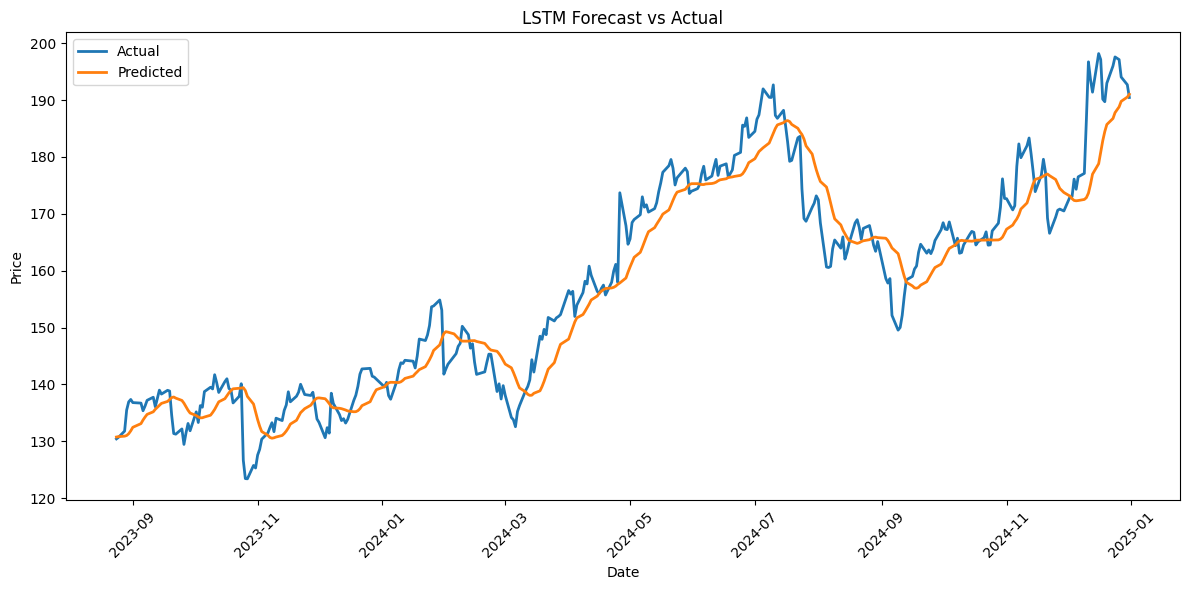

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_inv, label='Actual', linewidth=2)
plt.plot(test_dates, y_pred_inv, label='Predicted', linewidth=2)
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")


RMSE: 5.8338
MAE : 4.5576


In [42]:
last_sequence = close_data_norm[-seq_length:]  # shape: (60, 1)
current_input = last_sequence.reshape(1, seq_length, 1)  # shape: (1, 60, 1)

future_preds = []

for _ in range(10):  # forecast 10 steps
    next_pred = model.predict(current_input)  # shape: (1, 1)
    future_preds.append(next_pred[0, 0])  # store scalar value

    # Prepare next input by appending prediction and removing oldest
    next_step = next_pred.reshape(1, 1, 1)  # shape: (1, 1, 1)
    current_input = np.concatenate((current_input[:, 1:, :], next_step), axis=1)

future_preds = np.array(future_preds).reshape(-1, 1)
future_preds_inv = scaler.inverse_transform(future_preds)

last_date = pd.to_datetime(df['date'].iloc[-1])
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=10).date

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


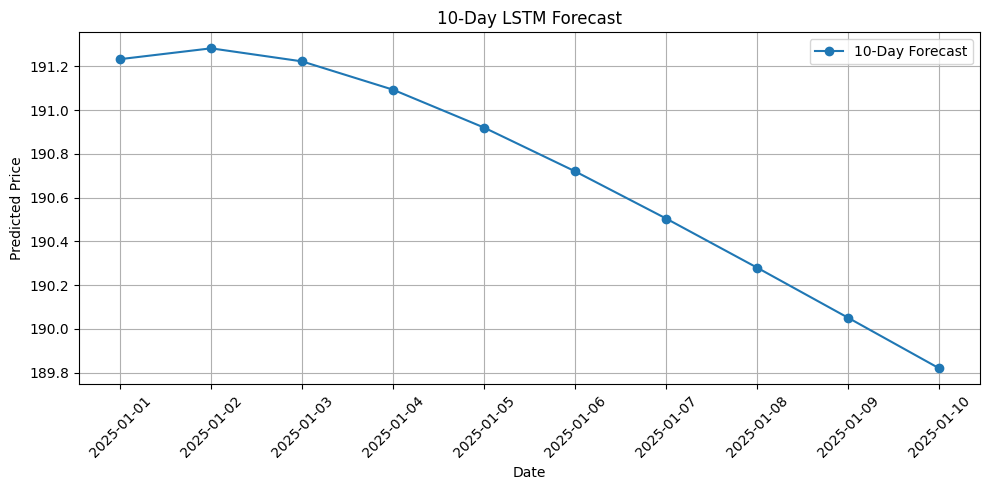

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(future_dates, future_preds_inv, marker='o', label='10-Day Forecast')
plt.title("10-Day LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,957 (585.77 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,972 (390.52 KB)

In [45]:
print(df['close'].corr(df['volume']))

-0.40098095581708515
